In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal
from scipy import *
import copy

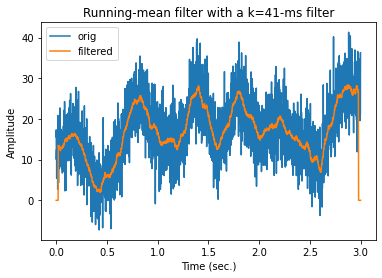

In [3]:
# create signal
srate = 1000 # Hz
time  = np.arange(0,3,1/srate)
n     = len(time)
p     = 15 # poles for random interpolation

# noise level, measured in standard deviations
noiseamp = 5

# amplitude modulator and noise level
ampl   = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*30)
noise  = noiseamp * np.random.randn(n)
signal = ampl + noise

# initialize filtered signal vector
filtsig = np.zeros(n)

# implement the running mean filter
k = 20 # filter window is actually k*2+1
for i in range(k,n-k-1):
    # each point is the average of k surrounding points
    filtsig[i] = np.mean(signal[i-k:i+k])

# compute window size in ms
windowsize = 1000*(k*2+1) / srate


# plot the noisy and filtered signals
plt.plot(time,signal,label='orig')
plt.plot(time,filtsig,label='filtered')

plt.legend()
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Running-mean filter with a k=%d-ms filter' %windowsize)

plt.show()


Need to recreate the above mean-smoothing time series by convolution theorem. 

1. Filter kernel for mean smoothing is just a square wave with 20 points. Take the FFT of this 
2. Take FFT of signal 
3. Multiply spectra from 1. and 2. 
4. Get inverse fourier transform of 3. 
5. Should have the same result as orange line in plot above

[0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0.]


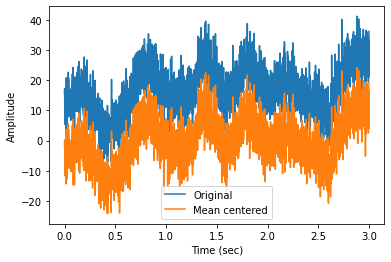

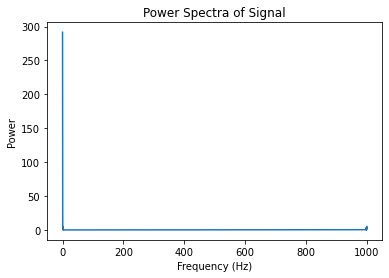

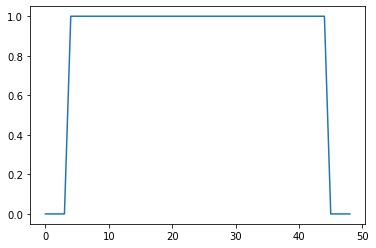

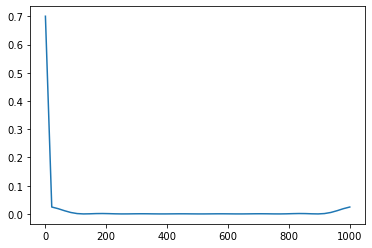

In [44]:


signal_norm = signal-np.mean(signal)

plt.plot(time, signal, label='Original')
plt.plot(time, signal_norm, label='Mean centered')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.legend()

npnts = len(signal)
#hz_vec = np.linspace(0, srate/2, int(np.floor(npnts/2)+1))
hz_vec = np.linspace(0, srate, npnts)

signal_pwr = np.abs(scipy.fft.fft(signal)/npnts)**2
plt.figure()
#plt.plot(hz_vec, signal_pwr[:len(hz_vec)], label = 'Original')
plt.plot(hz_vec, signal_pwr, label='Original')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Power Spectra of Signal')

square_kern = np.concatenate([np.zeros(4), np.ones(41), np.zeros(4)])

plt.figure()
print(square_kern)
plt.plot(square_kern)

square_kern_pwr = np.abs(scipy.fft.fft(square_kern)/len(square_kern))**2
hz_kern_vec = np.linspace(0, srate, len(square_kern))

plt.figure()
plt.plot(hz_kern_vec, square_kern_pwr)